# lab02 simple linear regression

## 아래의 독립변수와 종속변수 데이터로 linear hypothesis를 만드시오
hypothesis

In [1]:
import tensorflow as tf

# data
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

# weight 2.1
##############################
W = tf.Variable(2.1)
##############################
print(W)


# bias 2.5
##############################
b = tf.Variable(2.5)
##############################
print(b)

# hypothesis
##############################
hypothesis = x_data * W + b
##############################
hypothesis

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.1>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.5>


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 4.6     ,  6.7     ,  8.799999, 10.9     , 13.      ],
      dtype=float32)>

## 위의 hypothesis를 활용해서 linear regression의 cost 함수를 만드시오
cost

In [7]:
import tensorflow as tf

# cost
##############################
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
##############################
cost

<tf.Tensor: shape=(), dtype=float32, numpy=36.059998>

## gradient descent 1 epoch를 실행하시오
현재 기울기, gradient descent 1 epoch 실행후 기울기

In [28]:
tf.random.set_seed(7)

x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.1)
b = tf.Variable(2.5)

# learning rate 0.01
learning_rate = 0.01

# gradient descent 1 epoch
## GradientTape
##############################
with tf.GradientTape() as tape :
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
##############################

## print current gradient
##############################
w_grad, b_grad = tape.gradient(cost, [W, b])
print(w_grad.numpy(), b_grad.numpy())
##############################

print('원래 W와 b:', W.numpy(), b.numpy())
## update gradient
##############################
W.assign_sub(learning_rate * w_grad)
b.assign_sub(learning_rate * b_grad)
##############################


## print updated gradient
##############################
print('원래 gradient 업데이트 후 W와 b:', W.numpy(), b.numpy())
##############################

39.199997 11.599999
원래 W와 b: 2.1 2.5
원래 gradient 업데이트 후 W와 b: 1.708 2.384


## tf.GradientTape()로 y = x ^ 2에서 x = 3일 때의 기울기를 구하시오
기울기

In [37]:
# 상수 x
x = tf.constant(3.0)

# GradientTape()
#######################################
with tf.GradientTape() as tape :
    tape.watch(x)
    y = x*x
#######################################

# x = 3일 때 gradient 출력
#######################################
tape.gradient(y, x).numpy() # 상수를 못 받고, variable만 받을 수 있음
#######################################

6.0

## gradient descent alorithm으로 파라미터를 101번 업데이트 하시오
100번째 업데이트 후의 W, b 값과 cost 값 출력

In [40]:
W = tf.Variable(2.1)
b = tf.Variable(2.5)

# learning rate 0.01
learning_rate = 0.01

# 반복
for i in range(100+1):
    # GradientTape
    #######################################
    with tf.GradientTape() as tape :
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    #######################################
    
    # 현재 기울기
    #######################################
    w_grad, b_grad = tape.gradient(cost, [W, b])
    #######################################
    
    # 업데이트 후 기울기
    #######################################
    W.assign_sub(learning_rate * w_grad)
    b.assign_sub(learning_rate * b_grad)
    #######################################
    
    # 10번 업데이트 후 W, b, cost 출력
    #######################################
    if i % 10 == 0 :
        print(f'{i} |\t{W.numpy()} |\t{b.numpy()} |\t{cost.numpy()}')
    #######################################

0 |	1.7079999446868896 |	2.384000062942505 |	36.05999755859375
10 |	0.5413192510604858 |	1.9879915714263916 |	0.8665646314620972
20 |	0.47976887226104736 |	1.9005126953125 |	0.6615192294120789
30 |	0.4919293224811554 |	1.8357959985733032 |	0.6175261735916138
40 |	0.5085010528564453 |	1.7745680809020996 |	0.5770807862281799
50 |	0.5248445868492126 |	1.7154686450958252 |	0.5392872095108032
60 |	0.5406656265258789 |	1.6583433151245117 |	0.5039688348770142
70 |	0.5559612512588501 |	1.6031209230422974 |	0.47096362709999084
80 |	0.5707476139068604 |	1.5497373342514038 |	0.4401198923587799
90 |	0.5850416421890259 |	1.498131275177002 |	0.4112960696220398
100 |	0.5988597273826599 |	1.448243498802185 |	0.38435977697372437


# lab03 how to minimize cost

## linear regression model의 cost function을 tensorflow 사용하지 않고 짜기(numpy 가능)
hypothesis는 H(X) = W * X라고 가정하고, 아래 제시한 weight에 대해서 cost function의 값을 출력하시오

In [47]:
import numpy as np

X = np.array([1,2,3])
Y = np.array([1,2,3])

# cost funtion 정의
def cost_func(W, X, Y) :
    #######################################
    return np.square(W*X - Y).mean()
    #######################################

# 아래 제시한 w값에 대해 cost function 값 출력
for feed_W in np.linspace(-3, 5, num = 15) :
    #######################################
    print(cost_func(feed_W, X, Y))
    #######################################

74.66666666666667
54.85714285714287
38.095238095238095
24.380952380952383
13.714285714285717
6.095238095238099
1.5238095238095248
0.0
1.5238095238095226
6.0952380952380905
13.714285714285703
24.380952380952383
38.09523809523808
54.85714285714284
74.66666666666667


## linear regression model의 cost function을 tensorflow로 짜기
hypothesis는 H(X) = W * X라고 가정하고, 아래 제시한 weight에 대해서 cost function의 값을 출력하시오

In [49]:
import tensorflow as tf

X = np.array([1,2,3])
Y = np.array([1,2,3])

# cost function 정의(tensorflow 사용)
def cost_func(W, X, Y) :
    #######################################
    return tf.reduce_mean(tf.square(X*W - Y))
    #######################################
    
W_values = np.linspace(-3, 5, num=15)

for feed_W in W_values :
    print(f'W : {feed_W:5.2f} | cost : {cost_func(feed_W, X, Y):5.2f}')

W : -3.00 | cost : 74.67
W : -2.43 | cost : 54.86
W : -1.86 | cost : 38.10
W : -1.29 | cost : 24.38
W : -0.71 | cost : 13.71
W : -0.14 | cost :  6.10
W :  0.43 | cost :  1.52
W :  1.00 | cost :  0.00
W :  1.57 | cost :  1.52
W :  2.14 | cost :  6.10
W :  2.71 | cost : 13.71
W :  3.29 | cost : 24.38
W :  3.86 | cost : 38.10
W :  4.43 | cost : 54.86
W :  5.00 | cost : 74.67


## linear regression model의 cost function이 아래와 같을 때 GradientTape 없이(그외 tensorflow code 사용가능) gradient descent를 구현하시오
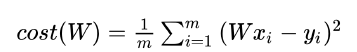
매 10회마다 w, cost 출력

In [74]:
tf.random.set_seed(0)

X = np.array([1,2,3])
Y = np.array([1,2,3])

W = tf.Variable(tf.random.normal([1], -100., 100.))

w = []; c = []
# 300회 gradient descent(update)
for i in range(100) :
    
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    # 현재 gradient
    #######################################
    learning_rate = 0.01
    gradient = tf.reduce_mean(tf.reduce_mean(tf.multiply(tf.multiply(W, x_data)-y_data, x_data)))
    #######################################
    
    # gradient update
    #######################################
    descent = W - tf.multiply(learning_rate, gradient)
    W.assign(descent)
    #######################################
    w.append(W.numpy()[0]); c.append(cost.numpy())
    # 매 10회마다 출력
    if i % 10 == 0 :
        print(f'i : {i:5} | W : {W.numpy()[0]:5.2f} | cost : {cost:5.2f}')

i :     0 | W : 45.59 | cost : 11716.31
i :    10 | W : 14.91 | cost : 1139.18
i :    20 | W :  5.34 | cost : 110.76
i :    30 | W :  2.35 | cost : 10.77
i :    40 | W :  1.42 | cost :  1.05
i :    50 | W :  1.13 | cost :  0.10
i :    60 | W :  1.04 | cost :  0.01
i :    70 | W :  1.01 | cost :  0.00
i :    80 | W :  1.00 | cost :  0.00
i :    90 | W :  1.00 | cost :  0.00


# lab04 multi-variable linear regression(matrix!!!!!!!!!!!!!)

## 아래와 같이 데이터가 주어졌을 때 tensorflow의 matrix 연산으로 hypothesis와 cost function을 계산하는 식을 완전하라.

In [56]:
tf.random.set_seed(0)

data = np.array([
    [73, 80, 75, 152],
    [93, 88, 93, 185],
    [89, 91, 90, 180],
    [96, 98, 100, 196],
    [73, 66, 70, 142]],
    dtype = np.float32)

X = data[:, :-1]
Y = data[:, [-1]]

# W, b 에 tensorflow 변수 객체 할당
#######################################
W = tf.Variable(tf.random.normal([3,1]))
b = tf.Variable(tf.random.normal([1]))
#######################################

n_epochs = 2000
for i in range(n_epochs+1) :
    with tf.GradientTape() as tape :
        # hypothesis, cost
        ##################################### 채우시오
        hypothesis = tf.matmul(X, W) + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
        #####################################
        
    W_grad, b_grad = tape.gradient(cost, [W,b])
    
    learning_rate = 0.00001
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 200 == 0 :
        print(f'i : {i} | cost : {cost.numpy()}')

i : 0 | cost : 1798.2894287109375
i : 200 | cost : 1.985764741897583
i : 400 | cost : 1.9071285724639893
i : 600 | cost : 1.8354984521865845
i : 800 | cost : 1.770180106163025
i : 1000 | cost : 1.7105076313018799
i : 1200 | cost : 1.655937910079956
i : 1400 | cost : 1.6059433221817017
i : 1600 | cost : 1.560052514076233
i : 1800 | cost : 1.5178825855255127
i : 2000 | cost : 1.4790351390838623


# lab 05 logistic regression

## logictic regression 구현에서 빈칸을 채우세요..^^;

In [92]:
# seed 설정
tf.random.set_seed(0)

# 훈련/테스트 데이터
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

# batch size(한번에 학습시킬 양) 설정
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

# tensorflow Variable 설정
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

# 가설 설정 함수
def logistic_regression(features):
    ##############################################
    hypothesis  = tf.divide(1., 1 + tf.exp(tf.matmul(features, W) + b))
    ##############################################
    return hypothesis

# cost/loss function 함수
def loss_fn(features, labels):
    ##############################################
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + \
                           (1 - labels) * tf.math.log(1 - logistic_regression(features)))
    ##############################################
    return cost

# cost function에서 gradient 구하는 함수
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(features,labels)
    ##############################################
    return tape.gradient(loss_value, [W,b])
    ##############################################

# optimizer : SGD
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) ###################
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b])) ##########################
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(features,labels)))
            
# accuracy 구하는 함수
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)  ############
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy            

# 학습 완료 후 accuracy를 구하시오
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000


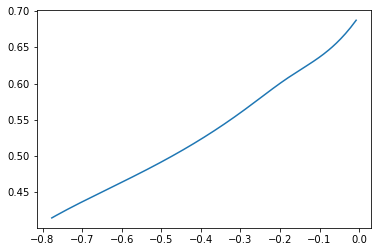

In [90]:
plt.plot(w, c)